<a href="https://www.kaggle.com/code/anderaraujo/heart-failure-pred?scriptVersionId=105664077" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
pip install pingouin

     |████████████████████████████████| 185 kB 4.4 MB/s 
     |████████████████████████████████| 9.8 MB 36.7 MB/s 
     |████████████████████████████████| 40 kB 3.3 MB/s 
     |████████████████████████████████| 233 kB 59.1 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196210 sha256=9e826a9af77c798cecca94c118a7dc1c77ee5d52c6a54f6793fa22d9adc65dbc
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=011fc4552ffebeed6c51227374030fed90b1b6fb426cb9bc1ee3210c884910a5
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: packaging
    Found existing in

In [3]:
import pingouin as pg

In [4]:
df = pd.read_csv('../input/heart-failure-prediction/heart.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


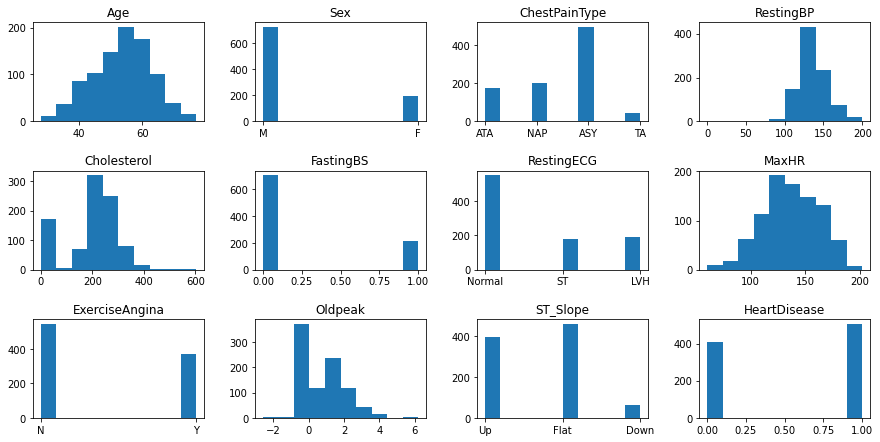

In [6]:
plt.figure(figsize=(15,10))
for col,i in zip(df.columns, range(1,13)):
    plt.subplot(4,4,i)
    plt.hist(x= df[col])
    plt.title(col)
plt.subplots_adjust(wspace=0.3, hspace=0.5)

<AxesSubplot:>

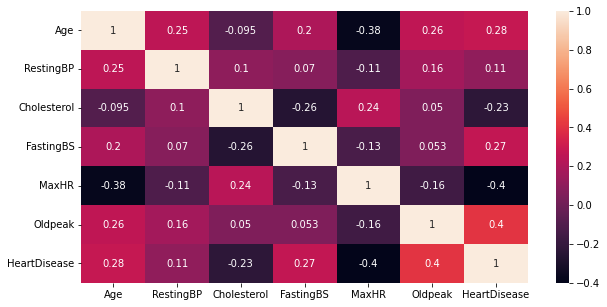

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot= True)

## Is Age influencing Heart Disease?

In [8]:
age_test = df.groupby(by=['HeartDisease'])[['Age']].mean().reset_index()
age_test

,HeartDisease,Age
0,0,50.551220
1,1,55.899606


In [9]:
expected, observed, stats = pg.chi2_independence(age_test, x='Age', y='HeartDisease')
stats                            

/opt/conda/lib/python3.7/site-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/opt/conda/lib/python3.7/site-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.0,1.0,1.0,0.0,0.05
1,cressie-read,0.666667,0.0,1.0,1.0,0.0,0.05
2,log-likelihood,0.000000,0.0,1.0,1.0,0.0,0.05
3,freeman-tukey,-0.500000,0.0,1.0,1.0,0.0,0.05
4,mod-log-likelihood,-1.000000,0.0,1.0,1.0,0.0,0.05
5,neyman,-2.000000,0.0,1.0,1.0,0.0,0.05


In [10]:
expected

HeartDisease,0,1
Age,,
50.551220,0.5,0.5
55.899606,0.5,0.5


Very high p-values. The Age does not qualifie as a good predictor for the presence of heart disease on this dataset.

## What Gender has higher HD rate?

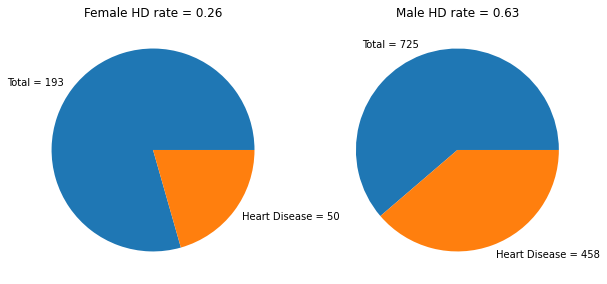

In [11]:
fhd1 = df[(df.HeartDisease == 1)&(df.Sex == 'F')].HeartDisease.sum()
amt_f = df[(df.Sex == 'F')].HeartDisease.count()
mhd1 = df[(df.HeartDisease == 1)&(df.Sex == 'M')].HeartDisease.sum()
amt_m = df[(df.Sex == 'M')].HeartDisease.count()

plt.figure(figsize=(10,10))
plt.subplot(1,2,1, title = f'Female HD rate = {fhd1/amt_f:.2}')
plt.pie(x=[amt_f,fhd1], labels=[f'Total = {amt_f}',f'Heart Disease = {fhd1}'])
plt.subplot(1,2,2, title = f'Male HD rate = {mhd1/amt_m :.2}')
plt.pie(x=[amt_m,mhd1], labels=[f'Total = {amt_m}',f'Heart Disease = {mhd1}'])
plt.show()

## What Chest pain got higher cases of HD?

<AxesSubplot:title={'center':'Chest pain'}>

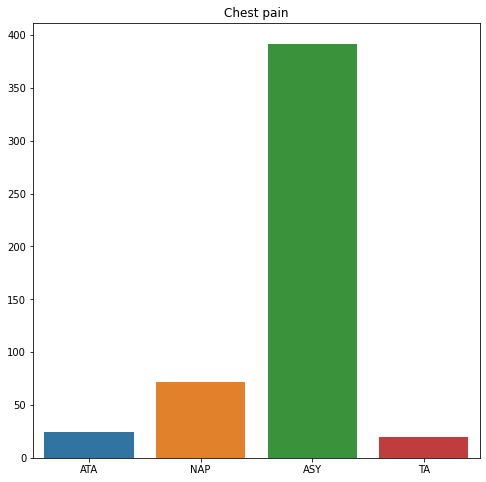

In [12]:
ata = df[(df.ChestPainType == 'ATA')&(df.HeartDisease == 1)].HeartDisease.sum()
nap = df[(df.ChestPainType == 'NAP')&(df.HeartDisease == 1)].HeartDisease.sum()
asy = df[(df.ChestPainType == 'ASY')&(df.HeartDisease == 1)].HeartDisease.sum()
ta = df[(df.ChestPainType == 'TA')&(df.HeartDisease == 1)].HeartDisease.sum()

plt.figure(figsize=(8,8))
plt.title('Chest pain')
sns.barplot(x=df.ChestPainType.unique(), y= [ata, nap, asy, ta])

In [13]:
df1 = pd.get_dummies(df)
df1

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [14]:
min_max_scaler = MinMaxScaler()
transformed = min_max_scaler.fit_transform(df1)
df2 = pd.DataFrame(transformed, columns= df1.columns)
df2

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.55,0.437811,0.0,0.507042,0.431818,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.816327,0.72,0.320066,1.0,0.570423,0.681818,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.591837,0.65,0.217247,0.0,0.387324,0.431818,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,0.591837,0.65,0.391376,0.0,0.802817,0.295455,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Spliting data

In [15]:
y= df2.HeartDisease
x= df2.drop(labels= 'HeartDisease', axis= 1)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state= 0)

## Creating model

In [17]:
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [18]:
y_pred = model.predict(x_test)

In [19]:
accuracy_score(y_test, y_pred)

0.8217391304347826

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76        92
         1.0       0.83      0.89      0.86       138

    accuracy                           0.82       230
   macro avg       0.82      0.80      0.81       230
weighted avg       0.82      0.82      0.82       230

